In [2]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r'D:\archive\student.csv')
data

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62
...,...,...,...
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78


In [9]:
data.shape

(1000, 3)

In [10]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

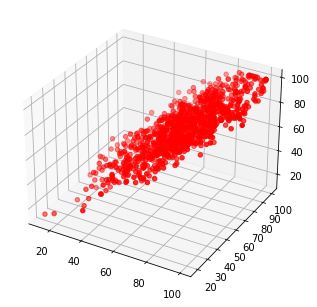

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='r')

In [27]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0,math,read]).T
B = np.array([0,0,0])
Y = np.array(write)
alpha = 0.001

In [28]:
def cost_function(X , Y ,B):
    m = len(Y)
    J = np.sum((X.dot(B)-Y)**2)/(2*m)
    return J
init_cost = cost_function(X,Y,B)
print('Initial Cost',init_cost)

Initial Cost 2470.11


In [30]:
def gradient_descent(X , Y , B , alpha , iterations):
    m = len(Y)
    cost_history = [0] * iterations
    for i in range(iterations):
        H = X.dot(B)
        loss = H - Y
        gradient = X.T.dot(loss)/m
        B = B - alpha * gradient
        cost = cost_function(X,Y,B)
        cost_history[i] = cost
    return B,cost_history

newB, cost_history = gradient_descent(X , Y , B , alpha , 100)
print('B is',newB)
print('Cost is',cost_history[-1])

B is [-2.19317903e+92 -1.54045704e+94 -1.59529197e+94]
Cost is 2.412437608791669e+192


In [34]:
def r2_score(Y , Y_pred):
    mean_y = np.mean(Y)
    tss = sum((Y - mean_y)**2)
    rss = sum((Y - Y_pred)**2)
    r2 = 1 - (rss/tss)
    return r2

Y_pred = X.dot(newB)
print(r2_score(Y,Y_pred))

-2.0791091712757856e+190
